# Clustering in Data Science - Learning Lab___ BY HECTOR___HNM

## **1. Introduction to Clustering**
# Clustering is an unsupervised learning technique that groups similar data points together.
# It is widely used in customer segmentation, anomaly detection, and pattern recognition.


# **2. Installing Required Libraries**

In [1]:
!pip install scikit-learn matplotlib seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


## **3. Generating Sample Data**

<ipython-input-2-cd8ac924248f>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)


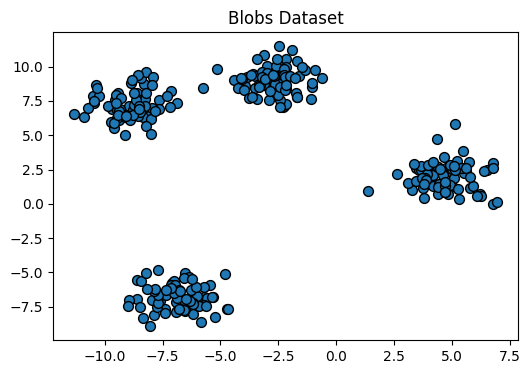

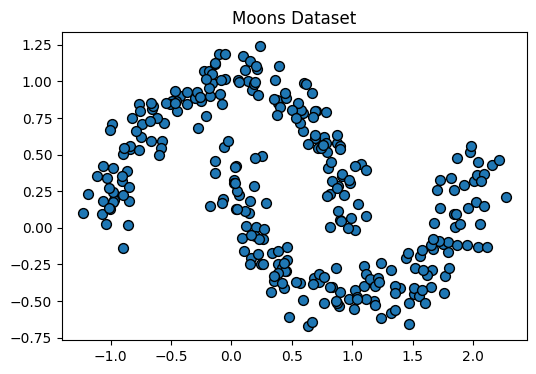

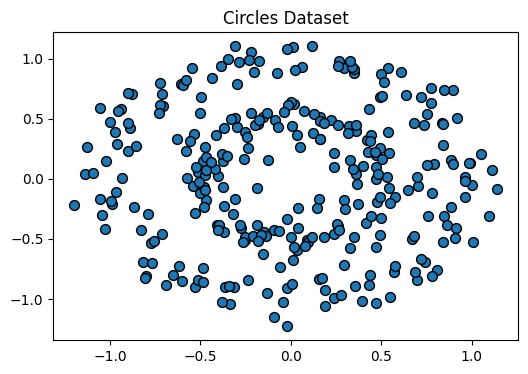

In [2]:
# We will create synthetic datasets to explore different clustering techniques.

def plot_data(X, labels=None, title="Dataset"):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.show()

# Generate different datasets
blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
circles, _ = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# Plot datasets
plot_data(blobs, title="Blobs Dataset")
plot_data(moons, title="Moons Dataset")
plot_data(circles, title="Circles Dataset")


## **4. K-Means Clustering**

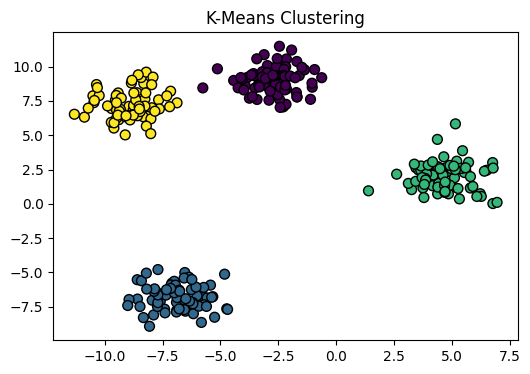

In [3]:

# K-Means is a centroid-based clustering technique that partitions data into k clusters.

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(blobs)
plot_data(blobs, kmeans_labels, title="K-Means Clustering")


## **5. Elbow Method for Optimal K in K-Means**


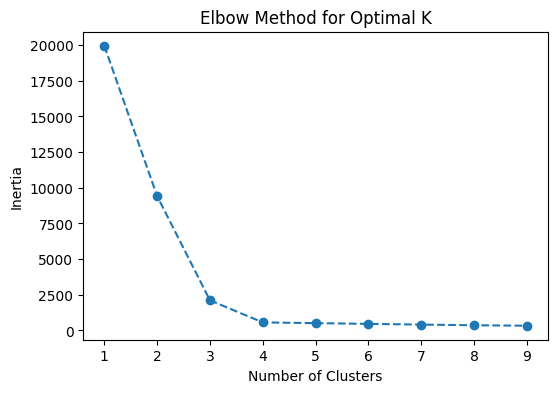

In [7]:
# The Elbow Method helps to determine the optimal number of clusters.

inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blobs)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


## **5. Hierarchical Clustering**

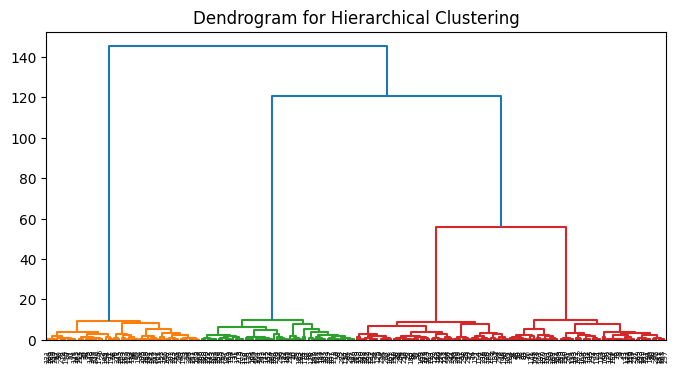

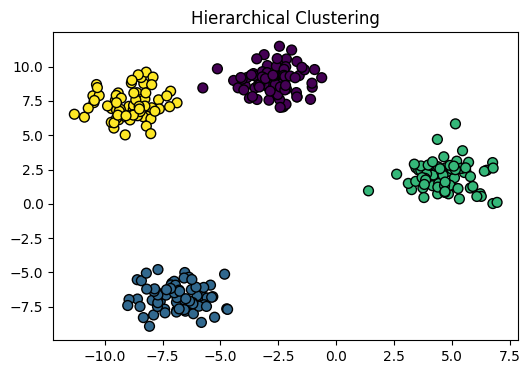

In [4]:
# Hierarchical clustering builds a hierarchy of clusters using a distance-based approach.

linkage_matrix = linkage(blobs, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(blobs)
plot_data(blobs, hierarchical_labels, title="Hierarchical Clustering")



## **6. DBSCAN (Density-Based Clustering)**

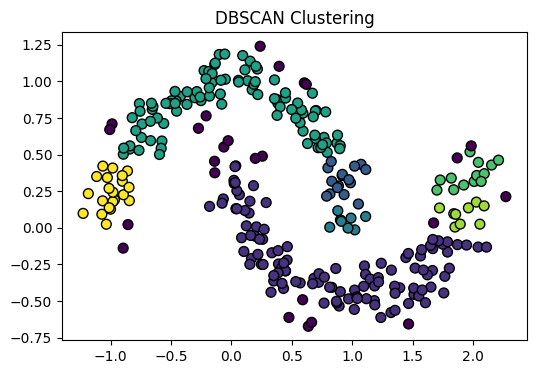

In [5]:

# DBSCAN is useful for identifying clusters of varying densities and detecting noise points.

scaler = StandardScaler()
moons_scaled = scaler.fit_transform(moons)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(moons_scaled)
plot_data(moons, dbscan_labels, title="DBSCAN Clustering")


## **7. Gaussian Mixture Model (GMM)**

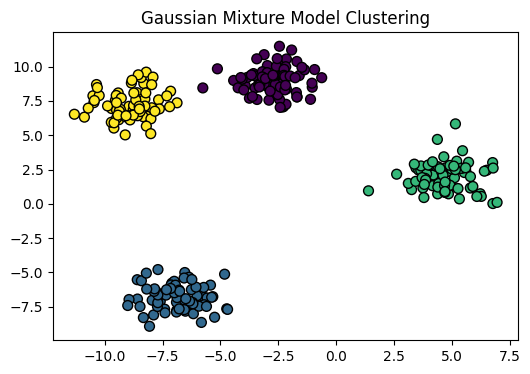

In [6]:
# ---

# GMM is a probabilistic clustering method that models data as a mixture of Gaussian distributions.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(blobs)
plot_data(blobs, gmm_labels, title="Gaussian Mixture Model Clustering")

# ---

## **8. Evaluating Clustering Performance**


In [9]:
# Silhouette Score: Measures how similar each point is to its cluster vs other clusters.
from sklearn.metrics import silhouette_score # Import silhouette_score

silhouette_kmeans = silhouette_score(blobs, kmeans_labels)
silhouette_hierarchical = silhouette_score(blobs, hierarchical_labels)
silhouette_gmm = silhouette_score(blobs, gmm_labels)

print(f'Silhouette Score (K-Means): {silhouette_kmeans:.2f}')
print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical:.2f}')
print(f'Silhouette Score (GMM): {silhouette_gmm:.2f}')

Silhouette Score (K-Means): 0.79
Silhouette Score (Hierarchical): 0.79
Silhouette Score (GMM): 0.79



## **9. When to Use Each Clustering Algorithm?**
# - **K-Means**: When clusters are well-separated and convex.
# - **Hierarchical Clustering**: When the number of clusters is unknown, and hierarchical structure is useful.
# - **DBSCAN**: When dealing with noise or clusters of varying shapes and densities.
# - **GMM**: When clusters are overlapping and probabilistic assignment is required.

# ---
## **9. Summary and Conclusion**
# - We explored multiple clustering techniques.
# - Visualized different clustering algorithms.
# - Discussed real-world applications of clustering.

## **14. Further Reading and References**
# - [Scikit-Learn Clustering Documentation](https://scikit-learn.org/stable/modules/clustering.html)
# - [Understanding K-Means](https://en.wikipedia.org/wiki/K-means_clustering)
# - [DBSCAN Algorithm](https://en.wikipedia.org/wiki/DBSCAN)